In [1]:
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from pyresample import kd_tree, geometry 

In [2]:
grd_file18 = r'/Users/gonzalgo/Downloads/greenl_00605_18011_002_180310_ALTTBB_HH_01.hgt.grd'
grd_file17 = r'/Users/gonzalgo/Downloads/greenl_00605_17028_004_170311_ALTTBB_HH_04.hgt.grd'

In [8]:
data18 = np.fromfile(grd_file18, dtype = '<f4')
data17 = np.fromfile(grd_file17, dtype = '<f4')

In [18]:
lat_lines18 = 28588
lon_lines18 = 8396

In [19]:
lat_lines17 = 28685
lon_lines17 = 8409

In [20]:
data18 = np.reshape(data18, (lat_lines18, lon_lines18))
data17 = np.reshape(data17, (lat_lines17, lon_lines17))

In [22]:
data_nan18 = np.where(data18 > -10000, data18, np.nan)
data_nan17 = np.where(data17 > -10000, data17, np.nan)

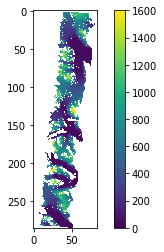

In [24]:
plt.imshow(data_nan18[::100, ::100], vmin=0, vmax=1600);plt.colorbar()

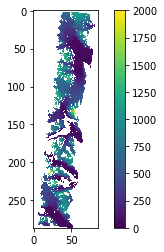

In [23]:
plt.imshow(data_nan17[::100, ::100], vmin=0, vmax=2000);plt.colorbar()

In [26]:
lat_start18 = 63.938138888888894  
lon_start18 = -41.987166666666667
lat_space18 = -2.777777777777778E-05
lon_space18 = 5.555555555555556E-05

lats18 = np.linspace(lat_start18 - 0.5 * lat_space18, (lat_start18 - 0.5 * lat_space18) + (lat_space18 * (lat_lines18 + 1)), lat_lines18 + 1)
lons18 = np.linspace(lon_start18 - 0.5 * lon_space18, (lon_start18 - 0.5 * lon_space18) + (lon_space18 * (lon_lines18 + 1)), lon_lines18 + 1)

In [25]:
lat_start17 = 63.943638888888898
lon_start17 = -41.986611111111117
lat_space17 = -2.777777777777778E-05
lon_space17 = 5.555555555555556E-05

lats17 = np.linspace(lat_start17 - 0.5 * lat_space17, (lat_start17 - 0.5 * lat_space17) + (lat_space17 * (lat_lines17 + 1)), lat_lines17 + 1)
lons17 = np.linspace(lon_start17 - 0.5 * lon_space17, (lon_start17 - 0.5 * lon_space17) + (lon_space17 * (lon_lines17 + 1)), lon_lines17 + 1)

CPU times: user 186 ms, sys: 29.8 ms, total: 216 ms
Wall time: 220 ms


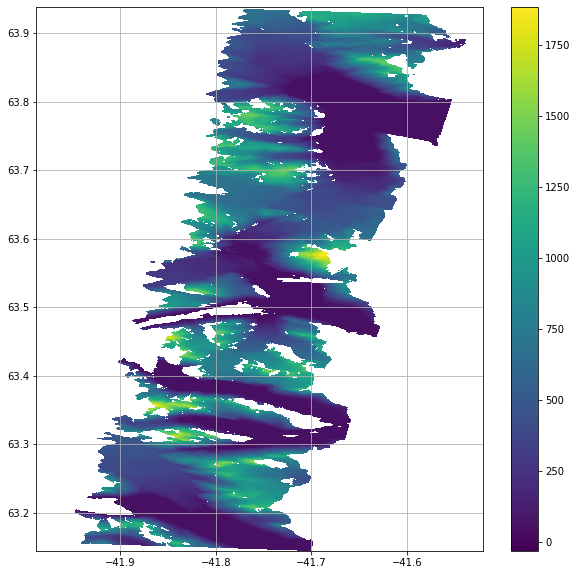

In [27]:
%time plt.figure(figsize=(10,10));plt.pcolormesh(lons18[::10], lats18[::10], data_nan18[::10, ::10]);plt.grid();plt.colorbar()

CPU times: user 186 ms, sys: 30.9 ms, total: 217 ms
Wall time: 220 ms


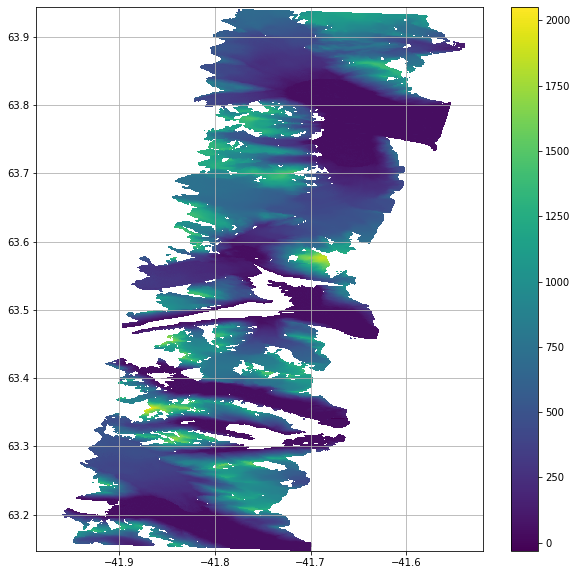

In [28]:
%time plt.figure(figsize=(10,10));plt.pcolormesh(lons17[::10], lats17[::10], data_nan17[::10, ::10]);plt.grid();plt.colorbar()

In [31]:
lower_left_lat18 = 63.156767143
lower_left_lon18 = -41.987115124
upper_right_lat18 = 63.925046546
upper_right_lon18 = -41.520804387

area_id = 'WGS84'
description = 'lat-lon'
proj_id = 'greenl_00605_180310'
proj_string = 'EPSG:4326'
width = 840
height = 2859
area_extent = (lower_left_lon18, lower_left_lat18, upper_right_lon18, upper_right_lat18)
area_original_18 = geometry.AreaDefinition(area_id, description, proj_id, proj_string, width, height, area_extent)

In [30]:
upper_right_lat17 = 63.930550738
upper_right_lon17 = -41.519516372
lower_left_lat17 = 63.159604107
lower_left_lon17 = -41.986574677


area_id = 'WGS84'
description = 'lat-lon'
proj_id = 'greenl_00605_170311'
proj_string = 'EPSG:4326'
width = 841
height = 2869
area_extent = (lower_left_lon17, lower_left_lat17, upper_right_lon17, upper_right_lat17)
area_original_17 = geometry.AreaDefinition(area_id, description, proj_id, proj_string, width, height, area_extent)

In [32]:
data_nan_subset18 = data_nan18[::10, ::10]
data_nan_subset17 = data_nan17[::10, ::10]

In [33]:
area_id = 'WGS84'
description = 'UTM 24n'
proj_id = 'greenl_00605_180310_new'
proj_string = 'EPSG:32624'
width = 2800
height = 800
area_extent = (350000, 7000000, 378000, 7100000)
area_new = geometry.AreaDefinition(area_id, description, proj_id, proj_string, width, height, area_extent)

In [35]:
%time result18 = kd_tree.resample_nearest(area_original_18, data_nan_subset18, area_new, radius_of_influence=800, fill_value=np.nan)

CPU times: user 2.01 s, sys: 176 ms, total: 2.19 s
Wall time: 2.31 s


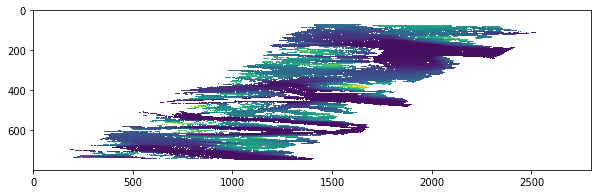

In [38]:
plt.figure(figsize=(10,10));plt.imshow(result18)

In [39]:
%time result17 = kd_tree.resample_nearest(area_original_17, data_nan_subset17, area_new, radius_of_influence=800, fill_value=np.nan)

CPU times: user 2 s, sys: 181 ms, total: 2.19 s
Wall time: 2.23 s


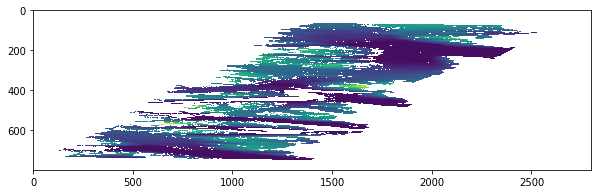

In [40]:
plt.figure(figsize=(10,10));plt.imshow(result17)

In [41]:
xe = np.linspace(350000, 378000, 2800)
ye = np.linspace(7100000, 7000000, 800)
xx, yy = np.meshgrid(xe, ye)

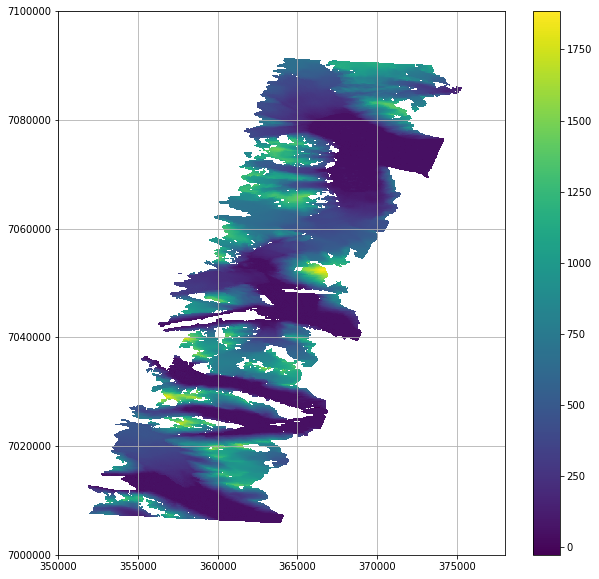

In [43]:
plt.figure(figsize=(10, 10));plt.pcolormesh(xx, yy, result18);plt.colorbar();plt.grid();

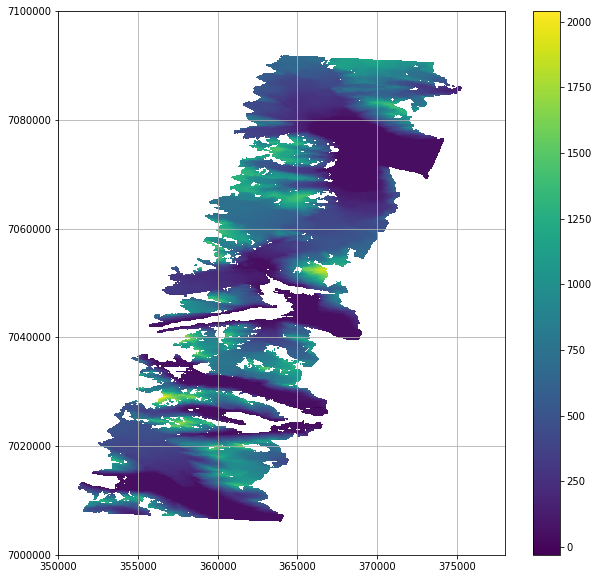

In [44]:
plt.figure(figsize=(10, 10));plt.pcolormesh(xx, yy, result17);plt.colorbar();plt.grid();

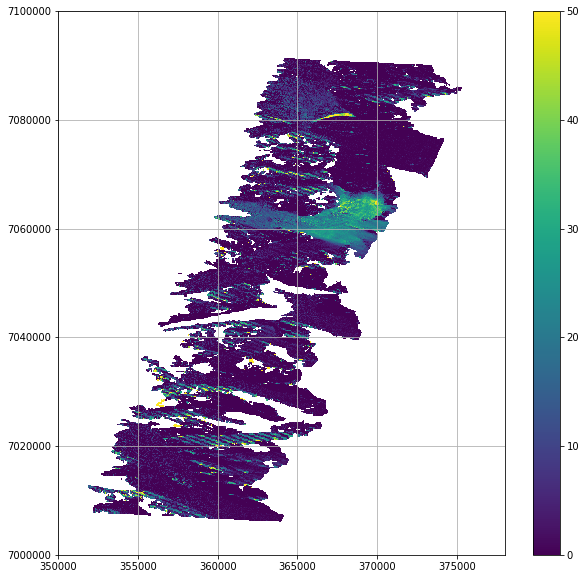

In [51]:
plt.figure(figsize=(10, 10));plt.pcolormesh(xx, yy, result17 - result18, vmax=50, vmin=0);plt.colorbar();plt.grid();